## SKLearn库实现

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# 加载加利福尼亚房价数据集
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 创建GBDT模型
gbdt = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 训练模型
gbdt.fit(X_train, y_train)

# 预测
y_pred = gbdt.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test,
                         y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2939973248643864


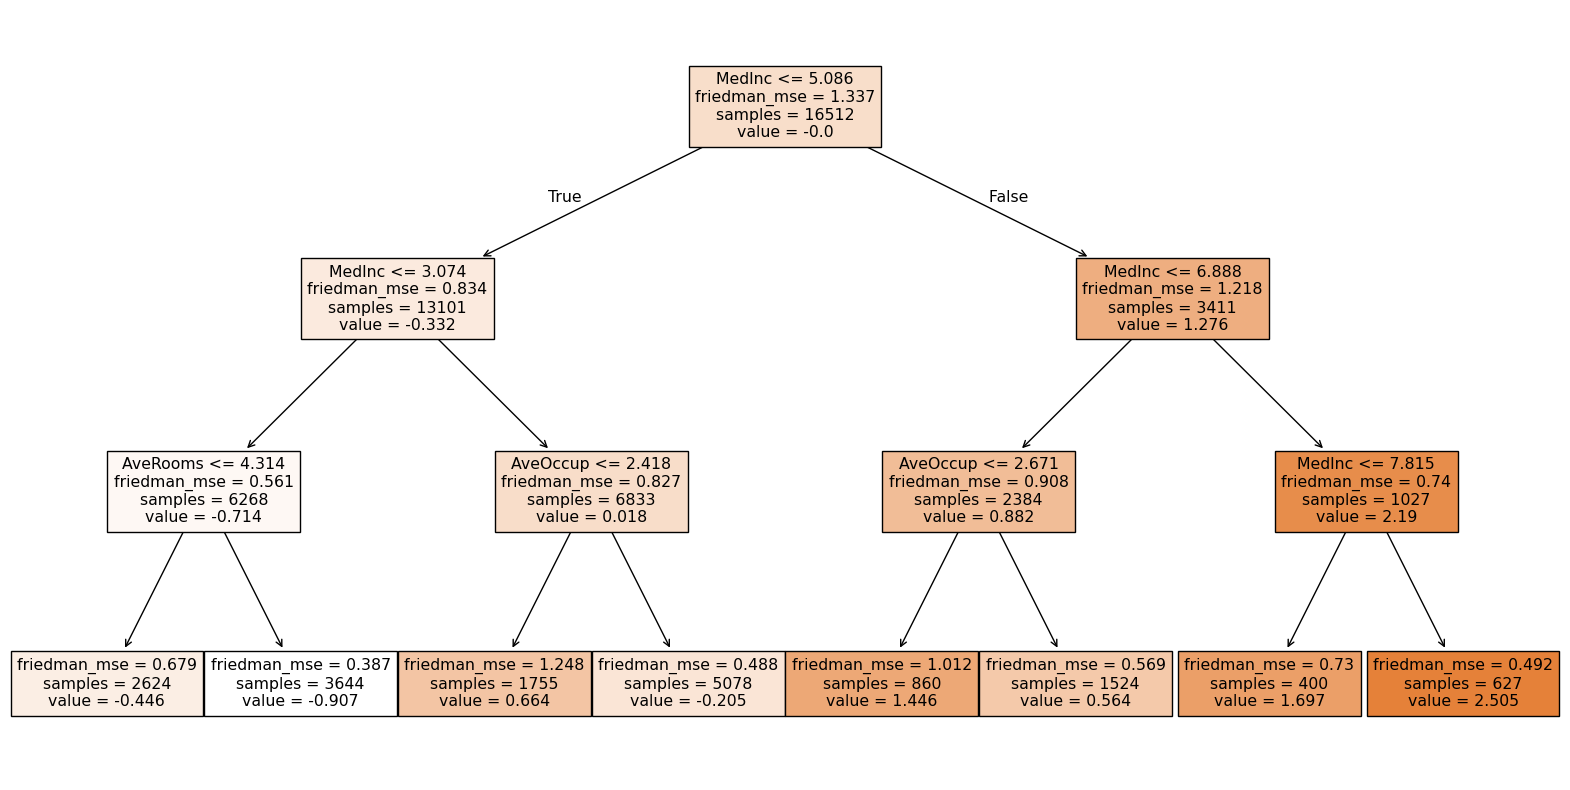

In [3]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# 绘制第一个决策树
plt.figure(figsize=(20, 10))
plot_tree(gbdt.estimators_[0, 0], filled=True,
          feature_names=california_housing.feature_names)
plt.show()

## 手动实现GBDT


模型参数

In [6]:
from sklearn.tree import DecisionTreeRegressor
max_depth = 3  # 决策树最大深度
n_estimators = 100  # 迭代次数
learning_rate = 0.1  # 学习率
trees = []  # 保存所有的决策树
initial_prediction = None  # 初始预测值

训练

In [7]:
initial_prediction = np.mean(y_train)
residuals = y - initial_prediction  # 计算残差
for _ in range(n_estimators):  # 迭代训练决策树
    # 训练一个决策树
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X, residuals)
    trees.append(tree)
    prediction = tree.predict(X)
    residuals -= learning_rate * prediction  # 更新残差

预测

In [9]:
def predict(X):
    global initial_prediction
    predictions = np.full(X.shape[0], initial_prediction)
    for tree in trees:
        predictions += learning_rate * tree.predict(X)
    return predictions

In [10]:
y_pred = predict(X_test)
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Manual GBDT): {mse}")

Mean Squared Error (Manual GBDT): 0.26996499493776716
